In [1]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

import tensorflow as tf

Using TensorFlow backend.
C:\Users\User\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorboard\compat\t

In [2]:
train_folder =  'D:/chest_xray/train_aug/'
test_folder = 'D:/chest_xray/test/'
val_folder = 'D:/chest_xray/val/'

In [3]:
 # create a new training normal folder with augmented images 
train_norm = train_folder +'NORMAL_aug/'
train_p = train_folder + 'PNEUMONIA/'

train_norm, train_p

('D:/chest_xray/train_aug/NORMAL_aug/', 'D:/chest_xray/train_aug/PNEUMONIA/')

In [4]:
os.listdir(train_norm)

['IM-0115-0001.jpeg',
 'IM-0117-0001.jpeg',
 'IM-0119-0001.jpeg',
 'IM-0122-0001.jpeg',
 'IM-0125-0001.jpeg',
 'IM-0127-0001.jpeg',
 'IM-0128-0001.jpeg',
 'IM-0129-0001.jpeg',
 'IM-0131-0001.jpeg',
 'IM-0133-0001.jpeg',
 'IM-0135-0001.jpeg',
 'IM-0137-0001.jpeg',
 'IM-0140-0001.jpeg',
 'IM-0141-0001.jpeg',
 'IM-0143-0001.jpeg',
 'IM-0145-0001.jpeg',
 'IM-0147-0001.jpeg',
 'IM-0149-0001.jpeg',
 'IM-0151-0001.jpeg',
 'IM-0152-0001.jpeg',
 'IM-0154-0001.jpeg',
 'IM-0156-0001.jpeg',
 'IM-0158-0001.jpeg',
 'IM-0160-0001.jpeg',
 'IM-0162-0001.jpeg',
 'IM-0164-0001.jpeg',
 'IM-0166-0001.jpeg',
 'IM-0168-0001.jpeg',
 'IM-0170-0001.jpeg',
 'IM-0172-0001.jpeg',
 'IM-0176-0001.jpeg',
 'IM-0177-0001.jpeg',
 'IM-0178-0001.jpeg',
 'IM-0180-0001.jpeg',
 'IM-0182-0001.jpeg',
 'IM-0183-0001.jpeg',
 'IM-0185-0001.jpeg',
 'IM-0187-0001.jpeg',
 'IM-0189-0001.jpeg',
 'IM-0191-0001.jpeg',
 'IM-0193-0001.jpeg',
 'IM-0195-0001.jpeg',
 'IM-0199-0001.jpeg',
 'IM-0201-0001.jpeg',
 'IM-0203-0001.jpeg',
 'IM-0205-

In [5]:

#Generate batches of tensor image data with real-time data augmentation. 
#The data will be looped over

train_gen=tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
            horizontal_flip=True)

test_gen=tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
            horizontal_flip=True)

In [6]:
#load train
train_generator=train_gen.flow_from_directory(
                train_folder,
                class_mode='binary')

Found 7567 images belonging to 2 classes.


In [7]:
#load test
test_generator = test_gen.flow_from_directory(
                    test_folder,
                    class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [8]:
#load validation
validation_generator=train_gen.flow_from_directory(
                val_folder,
                class_mode='binary')

Found 16 images belonging to 2 classes.


In [9]:
#Configures the model for training.

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8,(4,4),activation='relu'), # this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
    tf.keras.layers.MaxPooling2D(3,3), #The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned.
    tf.keras.layers.Conv2D(8,(4,4),activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(8,(4,4),activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [11]:
train=model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator                          
)

  ...
    to  
  ['...']
Train for 237 steps, validate for 1 steps
Epoch 1/5
237/237 [==============================] - 421s 2s/step - loss: 0.2798 - acc: 0.8749 - val_loss: 2.2409 - val_acc: 0.6250
Epoch 2/5
237/237 [==============================] - 275s 1s/step - loss: 0.1615 - acc: 0.9419 - val_loss: 0.4835 - val_acc: 0.7500
Epoch 3/5
237/237 [==============================] - 327s 1s/step - loss: 0.1239 - acc: 0.9547 - val_loss: 0.7670 - val_acc: 0.7500
Epoch 4/5
237/237 [==============================] - 349s 1s/step - loss: 0.0992 - acc: 0.9609 - val_loss: 0.6560 - val_acc: 0.6875
Epoch 5/5
237/237 [==============================] - 351s 1s/step - loss: 0.1020 - acc: 0.9619 - val_loss: 0.7922 - val_acc: 0.6875


In [15]:
accuracy=train.history['acc']
val_acc=train.history['val_acc']
loss=train.history['loss']
val_loss=train.history['val_loss']
epochs=list(range(5))

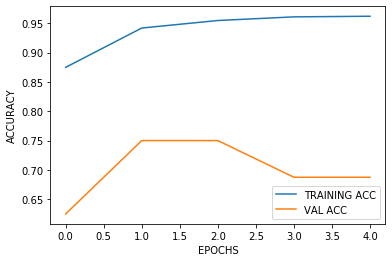

In [16]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.plot(epochs,val_acc)
plt.legend(['TRAINING ACC','VAL ACC'])
plt.show()

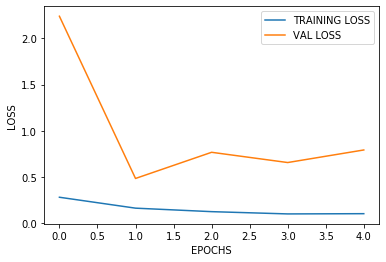

In [17]:
import matplotlib.pyplot as plt
plt.plot(epochs,loss)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.plot(epochs,val_loss)
plt.legend(['TRAINING LOSS','VAL LOSS'])
plt.show()

In [18]:
print("Accuracy : ",accuracy[-1]*100)

Accuracy :  96.19399905204773


In [19]:
IMG_SIZE = 50

t = np.array(test_gen)
t

array(<tensorflow.python.keras.preprocessing.image.ImageDataGenerator object at 0x000001AC447635C8>,
      dtype=object)

In [20]:

import pandas as pd 

p = model.predict_generator(test_generator)

pre = pd.DataFrame(p)

pre["filename"] = test_generator.filenames
pre["label"] = (pre["filename"].str.contains("PNEUMONIA")).apply(int)

Instructions for updating:
Please use Model.predict, which supports generators.


In [21]:
pre['pre'] = (pre[0]>0.5).apply(int)

pre

,0,filename,label,pre
0,0.999873,NORMAL\IM-0001-0001.jpeg,0,1
1,0.936776,NORMAL\IM-0003-0001.jpeg,0,1
2,0.998371,NORMAL\IM-0005-0001.jpeg,0,1
3,0.451349,NORMAL\IM-0006-0001.jpeg,0,0
4,0.999998,NORMAL\IM-0007-0001.jpeg,0,1
...,...,...,...,...
619,0.981291,PNEUMONIA\person96_bacteria_465.jpeg,1,1
620,0.790131,PNEUMONIA\person96_bacteria_466.jpeg,1,1
621,0.999882,PNEUMONIA\person97_bacteria_468.jpeg,1,1
622,0.905561,PNEUMONIA\person99_bacteria_473.jpeg,1,1


In [25]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,recall_score, classification_report, confusion_matrix

recall_score(pre["label"],pre["pre"]) 

0.8641025641025641

In [28]:


print(classification_report(pre['label'], pre['pre']))

cm = confusion_matrix(pre['label'], pre["pre"])

              precision    recall  f1-score   support

           0       0.29      0.09      0.14       234
           1       0.61      0.86      0.72       390

    accuracy                           0.58       624
   macro avg       0.45      0.48      0.43       624
weighted avg       0.49      0.58      0.50       624



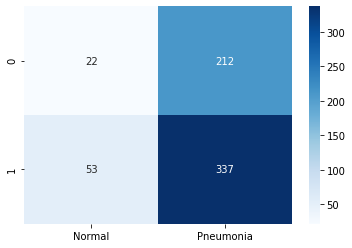

In [32]:
import seaborn as sns 

sns.heatmap(cm, xticklabels=("Normal", "Pneumonia"), cmap="Blues", annot=True, fmt='.3g')

In [33]:
import tensorflow as tf

from keras.models import load_model

model.save('best_recall_model.h5')